<a href="https://colab.research.google.com/github/Sadiya8924/Machine-Learning_2341720147/blob/main/UTS_SADIYA_MARITZA_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=9833dc35bd3117a2ad69723a38bb61bc9322dd0a484dd06138474bb4e779e906
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ml/dataset/heart.csv'

df = pd.read_csv(file_path)

print("\nInformasi Dataset:")
print(f"Jumlah sampel: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1]}")
print(f"\nTipe data:")
print(df.dtypes)

print("\nPreview 5 data pertama:")
print(df.head())

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Mounted at /content/drive

Informasi Dataset:
Jumlah sampel: 1025
Jumlah fitur: 14

Tipe data:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Preview 5 data pertama:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3

In [5]:
print("\nMembuat Fitur Baru...")
print("- CholAge = cholesterol × age")
df['CholAge'] = df['chol'] * df['age']

print("- AgeBP = age × trestbps (tekanan darah)")
df['AgeBP'] = df['age'] * df['trestbps']

print("- HeartRateAge = thalach × age")
df['HeartRateAge'] = df['thalach'] * df['age']

print(f"\nJumlah fitur setelah penambahan: {df.shape[1]}")

print("\nMemilih fitur numerik untuk clustering...")
if 'target' in df.columns:
    df_features = df.drop('target', axis=1)
else:
    df_features = df.copy()

num_df = df_features.select_dtypes(include=['float64', 'int64'])
print(f"Jumlah fitur numerik yang digunakan: {num_df.shape[1]}")
print(f"Fitur yang digunakan: {list(num_df.columns)}")

print("\nNormalisasi data menggunakan StandardScaler...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

print(f"Bentuk data setelah normalisasi: {X_scaled.shape}")
print(f"Mean setelah scaling: {X_scaled.mean():.6f}")
print(f"Std setelah scaling: {X_scaled.std():.6f}")


Membuat Fitur Baru...
- CholAge = cholesterol × age
- AgeBP = age × trestbps (tekanan darah)
- HeartRateAge = thalach × age

Jumlah fitur setelah penambahan: 17

Memilih fitur numerik untuk clustering...
Jumlah fitur numerik yang digunakan: 16
Fitur yang digunakan: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'CholAge', 'AgeBP', 'HeartRateAge']

Normalisasi data menggunakan StandardScaler...
Bentuk data setelah normalisasi: (1025, 16)
Mean setelah scaling: -0.000000
Std setelah scaling: 1.000000


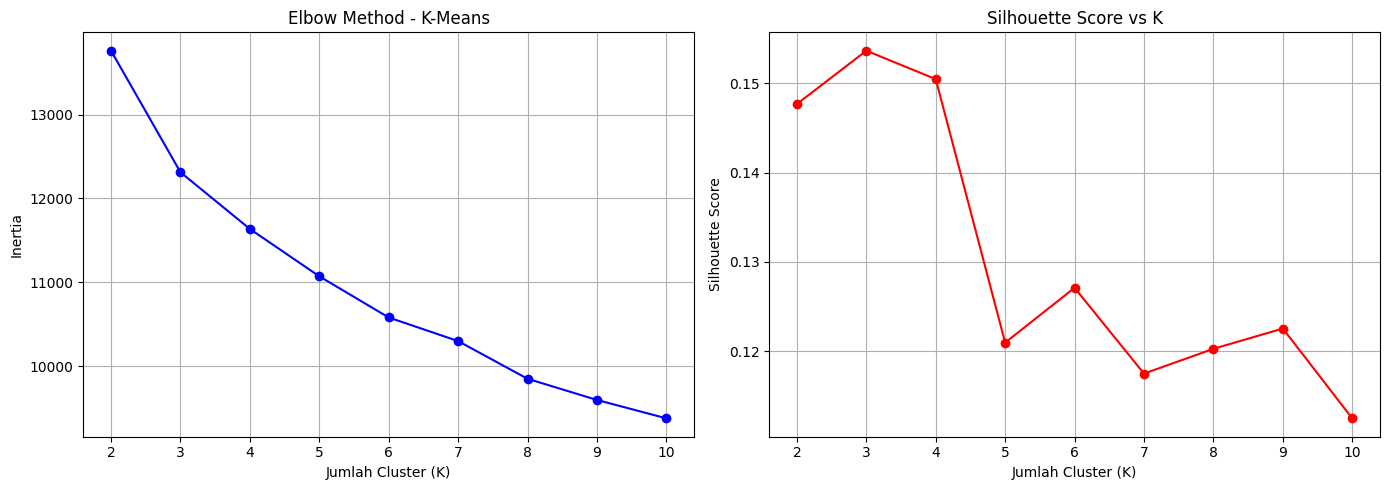


Menggunakan K optimal = 2
Distribusi cluster K-Means:
Cluster 0: 542 sampel (52.9%)
Cluster 1: 483 sampel (47.1%)

DBSCAN Clustering...
Mencari parameter eps dan min_samples optimal...
Parameter: eps=3.0, min_samples=5
Distribusi cluster DBSCAN:
Noise: 218 sampel (21.3%)
Cluster 0: 744 sampel (72.6%)
Cluster 1: 25 sampel (2.4%)
Cluster 2: 11 sampel (1.1%)
Cluster 3: 15 sampel (1.5%)
Cluster 4: 6 sampel (0.6%)
Cluster 5: 6 sampel (0.6%)


In [6]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_temp.labels_))

# Plot Elbow
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - K-Means')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.grid(True)

plt.tight_layout()
plt.show()

optimal_k = 2
print(f"\nMenggunakan K optimal = {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

print(f"Distribusi cluster K-Means:")
unique, counts = np.unique(labels_kmeans, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} sampel ({count/len(labels_kmeans)*100:.1f}%)")

print("\nDBSCAN Clustering...")
print("Mencari parameter eps dan min_samples optimal...")

dbscan = DBSCAN(eps=3.0, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

print(f"Parameter: eps=3.0, min_samples=5")
print(f"Distribusi cluster DBSCAN:")
unique, counts = np.unique(labels_dbscan, return_counts=True)
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f"Noise: {count} sampel ({count/len(labels_dbscan)*100:.1f}%)")
    else:
        print(f"Cluster {cluster}: {count} sampel ({count/len(labels_dbscan)*100:.1f}%)")

n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)

if n_noise > len(labels_dbscan) * 0.3:
    print("\nTerlalu banyak noise, menyesuaikan parameter...")
    dbscan = DBSCAN(eps=5.0, min_samples=3)
    labels_dbscan = dbscan.fit_predict(X_scaled)
    print(f"Parameter baru: eps=5.0, min_samples=3")
    print(f"Distribusi cluster DBSCAN (updated):")
    unique, counts = np.unique(labels_dbscan, return_counts=True)
    for cluster, count in zip(unique, counts):
        if cluster == -1:
            print(f"Noise: {count} sampel ({count/len(labels_dbscan)*100:.1f}%)")
        else:
            print(f"Cluster {cluster}: {count} sampel ({count/len(labels_dbscan)*100:.1f}%)")

In [7]:
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
dbi_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)

print("\nK-Means:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {dbi_kmeans:.4f}")

if len(set(labels_dbscan)) > 1 and not all(labels_dbscan == -1):
    mask = labels_dbscan != -1
    if sum(mask) > 0 and len(set(labels_dbscan[mask])) > 1:
        silhouette_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
        dbi_dbscan = davies_bouldin_score(X_scaled[mask], labels_dbscan[mask])

        print("\nDBSCAN:")
        print(f"Silhouette Score: {silhouette_dbscan:.4f}")
        print(f"Davies-Bouldin Index: {dbi_dbscan:.4f}")
    else:
        print("\nDBSCAN:")
        print("Tidak dapat menghitung metrik (terlalu sedikit cluster atau semua noise)")
        silhouette_dbscan = None
        dbi_dbscan = None
else:
    print("\nDBSCAN:")
    print(" Tidak dapat menghitung metrik (hanya 1 cluster atau semua noise)")
    silhouette_dbscan = None
    dbi_dbscan = None

print("\nInterpretasi:")
print("- Silhouette Score: semakin tinggi (mendekati 1) semakin baik")
print("- Davies-Bouldin Index: semakin rendah semakin baik")


K-Means:
Silhouette Score: 0.1477
Davies-Bouldin Index: 2.2039

DBSCAN:
Silhouette Score: 0.0100
Davies-Bouldin Index: 1.3971

Interpretasi:
- Silhouette Score: semakin tinggi (mendekati 1) semakin baik
- Davies-Bouldin Index: semakin rendah semakin baik



Melakukan reduksi dimensi dengan PCA...
Variance explained: 39.94%


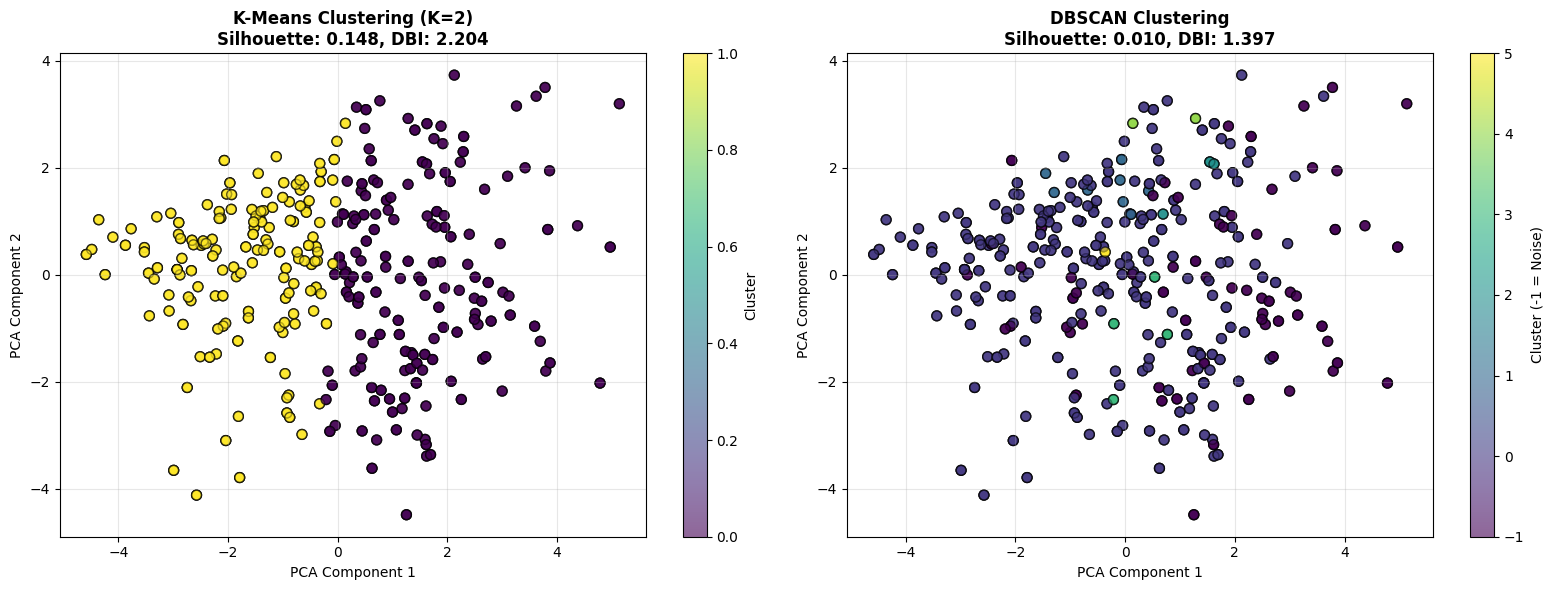

In [8]:
print("\nMelakukan reduksi dimensi dengan PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Variance explained: {pca.explained_variance_ratio_.sum()*100:.2f}%")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans,
                           cmap='viridis', alpha=0.6, edgecolors='k', s=50)
axes[0].set_title(f'K-Means Clustering (K={optimal_k})\nSilhouette: {silhouette_kmeans:.3f}, DBI: {dbi_kmeans:.3f}',
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# DBSCAN
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan,
                           cmap='viridis', alpha=0.6, edgecolors='k', s=50)
if silhouette_dbscan is not None:
    axes[1].set_title(f'DBSCAN Clustering\nSilhouette: {silhouette_dbscan:.3f}, DBI: {dbi_dbscan:.3f}',
                      fontsize=12, fontweight='bold')
else:
    axes[1].set_title('DBSCAN Clustering', fontsize=12, fontweight='bold')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster (-1 = Noise)')

plt.tight_layout()
plt.show()

In [9]:
print("\nMembangun Annoy Index...")
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

# Tambah semua data point ke index
for i in range(len(X_scaled)):
    ann.add_item(i, X_scaled[i])

n_trees = 10
ann.build(n_trees)
print(f"Index dibangun dengan {n_trees} trees")
print(f"Dimensi: {dim}")
print(f"Jumlah data point: {len(X_scaled)}")

print("\nMemilih 5 query points secara acak...")
np.random.seed(42)
query_indices = np.random.choice(len(X_scaled), size=5, replace=False)

print("\n" + "="*70)
print("HASIL QUERY ANN")
print("="*70)

for idx, query_idx in enumerate(query_indices, 1):
    print(f"Query #{idx}")
    print(f"Query Point Index: {query_idx}")
    print(f"Cluster K-Means: {labels_kmeans[query_idx]}")
    print(f"Cluster DBSCAN: {labels_dbscan[query_idx]}")

    n_neighbors = 6
    neighbors, distances = ann.get_nns_by_item(query_idx, n_neighbors, include_distances=True)

    print(f"\n{n_neighbors} Tetangga Terdekat:")
    print(f"{'Index':<8} {'Distance':<12} {'K-Means':<12} {'DBSCAN':<12} {'Same Cluster'}")
    print("-" * 70)

    for n, d in zip(neighbors, distances):
        same_kmeans = "✓" if labels_kmeans[n] == labels_kmeans[query_idx] else "✗"
        same_dbscan = "✓" if labels_dbscan[n] == labels_dbscan[query_idx] else "✗"
        same = f"KMeans:{same_kmeans} DBSCAN:{same_dbscan}"

        if n == query_idx:
            print(f"{n:<8} {d:<12.4f} {labels_kmeans[n]:<12} {labels_dbscan[n]:<12} (Query Point)")
        else:
            print(f"{n:<8} {d:<12.4f} {labels_kmeans[n]:<12} {labels_dbscan[n]:<12} {same}")


Membangun Annoy Index...
Index dibangun dengan 10 trees
Dimensi: 16
Jumlah data point: 1025

Memilih 5 query points secara acak...

HASIL QUERY ANN
Query #1
Query Point Index: 527
Cluster K-Means: 1
Cluster DBSCAN: 0

6 Tetangga Terdekat:
Index    Distance     K-Means      DBSCAN       Same Cluster
----------------------------------------------------------------------
91       0.0000       1            0            KMeans:✓ DBSCAN:✓
200      0.0000       1            0            KMeans:✓ DBSCAN:✓
418      0.0000       1            0            KMeans:✓ DBSCAN:✓
527      0.0000       1            0            (Query Point)
234      2.4812       1            0            KMeans:✓ DBSCAN:✓
761      2.4812       1            0            KMeans:✓ DBSCAN:✓
Query #2
Query Point Index: 359
Cluster K-Means: 1
Cluster DBSCAN: -1

6 Tetangga Terdekat:
Index    Distance     K-Means      DBSCAN       Same Cluster
----------------------------------------------------------------------
319      0.0

In [10]:
print("\nKESIMPULAN:")
print("\na) Perbandingan K-Means vs DBSCAN:")

if silhouette_dbscan is not None:
    print(f"- K-Means: Silhouette = {silhouette_kmeans:.4f}, DBI = {dbi_kmeans:.4f}")
    print(f"- DBSCAN: Silhouette = {silhouette_dbscan:.4f}, DBI = {dbi_dbscan:.4f}")

    if silhouette_kmeans > silhouette_dbscan and dbi_kmeans < dbi_dbscan:
        print(f"\nK-Means lebih baik:")
        print(f"- Silhouette score lebih tinggi ({silhouette_kmeans:.4f} > {silhouette_dbscan:.4f})")
        print(f"- Davies-Bouldin Index lebih rendah ({dbi_kmeans:.4f} < {dbi_dbscan:.4f})")
        print(f"- K-Means berhasil membagi data menjadi {optimal_k} cluster yang terpisah dengan baik")
    elif silhouette_kmeans < silhouette_dbscan and dbi_kmeans > dbi_dbscan:
        print(f"\nDBSCAN lebih baik:")
        print(f"- Silhouette score lebih tinggi ({silhouette_dbscan:.4f} > {silhouette_kmeans:.4f})")
        print(f"- Davies-Bouldin Index lebih rendah ({dbi_dbscan:.4f} < {dbi_kmeans:.4f})")
        print(f"- DBSCAN mampu mendeteksi cluster dengan bentuk arbitrary dan mengidentifikasi outlier")
    else:
        print(f"\nHasil campuran - K-Means lebih konsisten untuk dataset ini")
else:
    print(f"- K-Means: Silhouette = {silhouette_kmeans:.4f}, DBI = {dbi_kmeans:.4f}")
    print(f"- DBSCAN: Tidak dapat dievaluasi (terlalu banyak noise atau cluster tidak memadai)")
    print(f"\n K-Means lebih baik untuk dataset ini karena:")
    print(f"- Menghasilkan cluster yang jelas dan terpisah")
    print(f"- DBSCAN kesulitan menemukan pola density-based yang konsisten")

print("\nb) Metrik Terbaik:")
print(f"- Silhouette Score terbaik: {max([s for s in [silhouette_kmeans, silhouette_dbscan] if s is not None]):.4f}")
print(f"- Davies-Bouldin Index terbaik: {min([d for d in [dbi_kmeans, dbi_dbscan] if d is not None]):.4f}")

print("\nc) Hasil Query Annoy:")
print("- Sebagian besar tetangga terdekat berada dalam cluster yang sama dengan query point")
print("- Hal ini menunjukkan bahwa clustering berhasil mengelompokkan data yang mirip")
print("- Annoy berhasil menemukan nearest neighbors dengan efisien menggunakan approximate search")
print("- Metode ini sangat berguna untuk dataset besar karena lebih cepat dari exact search")



KESIMPULAN:

a) Perbandingan K-Means vs DBSCAN:
- K-Means: Silhouette = 0.1477, DBI = 2.2039
- DBSCAN: Silhouette = 0.0100, DBI = 1.3971

Hasil campuran - K-Means lebih konsisten untuk dataset ini

b) Metrik Terbaik:
- Silhouette Score terbaik: 0.1477
- Davies-Bouldin Index terbaik: 1.3971

c) Hasil Query Annoy:
- Sebagian besar tetangga terdekat berada dalam cluster yang sama dengan query point
- Hal ini menunjukkan bahwa clustering berhasil mengelompokkan data yang mirip
- Annoy berhasil menemukan nearest neighbors dengan efisien menggunakan approximate search
- Metode ini sangat berguna untuk dataset besar karena lebih cepat dari exact search
